In [11]:
import pandas as pd

# Define the years for which you have data
years = range(2012, 2024)  # This assumes you have data from 2012 to 2023

# Create an empty dictionary to store DataFrames
dataframes = {}

# Loop through the years and read the corresponding CSV files
for year in years:
    file_path = f'Data/processed_data_{year}.csv'  # Adjust the file name pattern as needed
    df = pd.read_csv(file_path, delimiter=',')
    dataframes[f'df_x{year}'] = df

# Now, you have a dictionary with DataFrames for each year, e.g., dataframes['df_x2012'] for 2012 data.


In [2]:
dataframes["df_x2023"].columns

Index(['Trieda PK', 'Číslo PK', 'Most /DC', 'Názov mosta', 'ID mosta', 'ID DC',
       'správcovské číslo', 'Stavebno-technický stav', 'Longitude', 'Latitude',
       'Vyska', 'Druh konštrukcie', 'Material', 'Normána zaťažiteľnost / t',
       'Výhradná zaťažiteľnosť / t', 'Výnimočná zaťažiteľnosť / t',
       'Spôsob stanovenia', 'Predmet premostenia', 'Rok postavenia',
       'Zaťažovacia trieda STN', 'Počet otvorov', 'Dĺžka premostenia / m',
       'Dĺžka nosnej konštrukcie / m', 'Volná šírka mosta/ m',
       'Šírka medzi obrubami/ m', 'Pocha mosnej konštrukcie / m2',
       'Plocha mosta / m2', 'Vlastník úseku', 'Správca úseku', 'Okres',
       'Smer úseku', 'Typ úseku', 'Počiatočný uzol', 'Koncový uzol', 'úsek ID',
       'úsekové staničenie začiatku DC / m',
       'Kilometrovníkové staničenie začiatku DC / km',
       'Kumulatívne staničenie začiatku DC / km', 'Poradie'],
      dtype='object')

In [12]:
import pandas as pd

# Create an empty dataframe to store the merged results
merged_df = pd.DataFrame()

# Loop through the dataframes
for year, df in dataframes.items():
    if 'ID mosta' in df.columns and 'Stavebno-technický stav' in df.columns:
        # Select the columns of interest from the current dataframe
        if year == "df_x2023":
            df_subset = df[['ID mosta', 'Stavebno-technický stav',
                            "Okres", "Longitude", "Latitude", "Material", 
                            'Názov mosta', 'Dĺžka premostenia / m', 
                            'Rok postavenia', 'Volná šírka mosta/ m', 
                            'Normána zaťažiteľnost / t', 'Trieda PK',
                            'Druh konštrukcie']]
        else:
            df_subset = df[['ID mosta', 'Stavebno-technický stav']]
        # Merge the current dataframe with the existing merged_df
        if merged_df.empty:
            # If merged_df is empty, set it to the current dataframe
            merged_df = df_subset.copy()
        else:
            # Merge the current dataframe with merged_df
            merged_df = pd.merge(merged_df, df_subset, on='ID mosta', how='outer', suffixes=('', f'_{year}'))
    else:
        print(f'Columns not found in {year} dataframe.')

# Rename the "Stavebno-technický stav" column
merged_df.rename(columns={'Stavebno-technický stav': 'Stavebno-technický stav_df_x2012'}, inplace=True)


# Create a dictionary to map the old column names to the new ones
column_mapping = {}
for year in range(2012, 2024):
    old_column_name = f'Stavebno-technický stav_df_x{year}'
    new_column_name = str(year)
    column_mapping[old_column_name] = new_column_name

# Rename the columns using the dictionary
merged_df.rename(columns=column_mapping, inplace=True)

#### REGIONS
# Define the region-to-district mapping
region_mapping = {
    'Bratislava': ['Bratislava I', 'Bratislava II', 'Bratislava III', 'Bratislava IV', 'Bratislava V', 'Malacky', 'Pezinok', 'Senec'],
    'Trnava': ['Dunajská Streda', 'Galanta', 'Hlohovec', 'Piešťany', 'Senica', 'Skalica', 'Trnava'],
    'Trenčín': ['Bánovce nad Bebravou', 'Ilava', 'Myjava', 'Nové Mesto nad Váhom', 'Partizánske', 'Považská Bystrica', 'Prievidza', 'Púchov', 'Trenčín'],
    'Nitra': ['Komárno', 'Levice', 'Nitra', 'Nové Zámky', 'Šaľa', 'Topoľčany', 'Zlaté Moravce'],
    'Žilina': ["Turčianske Teplice", 'Bytča', 'Dolný Kubín', 'Kysucké Nové Mesto', 'Liptovský Mikuláš', 'Martin', 'Námestovo', 'Ružomberok', 'Tvrdošín', "Čadca", "Žilina"],
    'Banská Bystrica': ['Banská Štiavnica', "Rimavská Sobota", "Žiar nad Hronom", "Žarnovica", 'Banská Bystrica', 'Brezno', 'Detva', 'Krupina', 'Lučenec', 'Poltár', 'Revúca', 'Veľký Krtíš', 'Zvolen'],
    'Prešov': ["Svidník", "Stará Ľubovňa", 'Bardejov', 'Humenné', 'Kežmarok', 'Levoča', 'Medzilaborce', 'Poprad', 'Prešov', 'Sabinov', 'Snina', 'Spišská Nová Ves', 'Stropkov', 'Vranov nad Topľou'],
    'Košice': ['Gelnica', 'Košice I', 'Košice II', 'Košice III', 'Košice IV', 'Košice - okolie', 'Michalovce', 'Rožňava', 'Sobrance', 'Trebišov']
}

# Create a function to map districts to regions
def map_to_region(district):
    for region, districts in region_mapping.items():
        if district in districts:
            return region
    return 'Nezistený'  # If not found, return 'Unknown'

# Apply the mapping function to create the 'Region' column
merged_df['Kraj'] = merged_df['Okres'].apply(map_to_region)

# Display the filtered dataframe
merged_df = merged_df.drop_duplicates(subset="ID mosta")

merged_df.fillna("Nezistený", inplace=True)

# Define a mapping of conditions to their respective values
condition_mapping = {
    'Zlý': 5,
    'Veľmi zlý': 6,
    'Uspokojivý': 4,
    'Bezchybný': 1,
    'Dobrý': 3,
    'Havarijný': 7,
    'Nezistený': 0,
    'Veľmi dobrý': 2
}

# Loop through each year and create a new column
for year in years:
    condition_col_name = f'n_{year}'
    merged_df[condition_col_name] = merged_df[str(year)].replace(condition_mapping)

# Now, merged_df has new columns n_2012, n_2013, ..., n_2023 with the specified values for each condition.

merged_df.reset_index(drop=True, inplace=True)

merged_df.rename(columns={
    'Dĺžka premostenia / m': 'Dĺžka premostenia',
    'Normána zaťažiteľnost / t': 'Normána zaťažiteľnost',
    'Volná šírka mosta/ m': 'Volná šírka mosta',
}, inplace=True)

# Print the columns of the merged dataframe
print(merged_df.columns, len(merged_df.columns))


Index(['ID mosta', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', 'Okres', 'Longitude',
       'Latitude', 'Material', 'Názov mosta', 'Dĺžka premostenia',
       'Rok postavenia', 'Volná šírka mosta', 'Normána zaťažiteľnost',
       'Trieda PK', 'Druh konštrukcie', 'Kraj', 'n_2012', 'n_2013', 'n_2014',
       'n_2015', 'n_2016', 'n_2017', 'n_2018', 'n_2019', 'n_2020', 'n_2021',
       'n_2022', 'n_2023'],
      dtype='object') 37


/tmp/ipykernel_3907/1823782129.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Nezistený' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_df.fillna("Nezistený", inplace=True)


In [13]:
merged_df.to_csv('data_full.csv', index=False)

Plotting

In [7]:
import folium

target_region = 'Košice'  # Specify the target region

# Filter the DataFrame for bridges with valid coordinates in the Košice region
filtered_df = merged_df[
    ((merged_df["Longitude"]) != "Nezistený") & 
    ((merged_df["Latitude"]) != "Nezistený") & 
    
    (merged_df['n_2023'] == 7)
    
]
# (merged_df['Kraj'] == target_region) & 
# (merged_df['Material'] == "prefabrikovaný predpätý betón")


# Create a map centered on Slovakia (you can adjust the coordinates and zoom level)
m = folium.Map(location=[48.63, 21.3], zoom_start=9, tiles='Stamen Toner')

# Define the custom marker icons for each condition
markers_palette = {
    1: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_1.svg',  # Bezchybný
    2: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_2.svg',  # Veľmi dobrý
    3: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_3.svg',  # Dobrý
    4: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_4.svg',  # Uspokojivý
    5: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_5.svg',  # Zlý
    6: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_6.svg',  # Veľmi zlý
    7: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_7.svg',  # Havarijný
    0: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_0.svg',  # Nezistený
}

# Iterate through your DataFrame and add markers for each bridge with custom icons and HTML popups
for index, row in filtered_df.iterrows():
    condition = row['n_2023']  # Get the condition value for the bridge
    marker_icon_url = markers_palette[condition]  # Get the corresponding marker URL
    
    # Create an HTML popup with custom content including Montserrat font
    popup_html = f"""
    <style>
        /* Use the Montserrat font for the popup content */
        body {{
            font-family: 'Montserrat', sans-serif;
        }}
    </style>
    <h4>Údaje o moste: {row['ID mosta']}</h4>
    <p>
    Názov: {row['Názov mosta']} <br>
    Okres: {row['Okres']} <br>
    STS: {row['n_2023']} - {row['2023']} <br>
    </p>
    """
    
    custom_marker_icon = folium.CustomIcon(
        icon_image=marker_icon_url,
        icon_size=(50, 50),  # Adjust the size as needed
        icon_anchor=(25, 50),  # Adjust the anchor point as needed
    )
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),  # Use the HTML popup
        icon=custom_marker_icon,  # Use the custom icon
    ).add_to(m)

# Display the map
m#.save('bridges_map_STS6.html')


In [10]:
import folium

# Create a map centered on a location
m = folium.Map(location=[48.7, 19.6], zoom_start=7, tiles='Stamen Toner')

# Define the custom marker icons for each condition
markers_palette = {
    1: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_1.svg',  # Bezchybný
    2: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_2.svg',  # Veľmi dobrý
    3: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_3.svg',  # Dobrý
    4: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_4.svg',  # Uspokojivý
    5: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_5.svg',  # Zlý
    6: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_6.svg',  # Veľmi zlý
    7: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_7.svg',  # Havarijný
    0: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_0.svg',  # Nezistený
}

# Iterate through your DataFrame and add markers for each bridge with custom icons and HTML popups
for index, row in filtered_df.iterrows():
    condition = row['n_2023']  # Get the condition value for the bridge
    marker_icon_url = markers_palette[condition]  # Get the corresponding marker URL
    bridge_id = row['ID mosta']  # Get the bridge ID
    
    # Define the image URL (replace with the actual URL of your image)
    image_url = f"https://raw.githubusercontent.com/Medvedku/Assets/main/markers/conditions/{bridge_id}_condition.png"
    
    # Create an HTML popup with custom content including Montserrat font and the embedded image (chart)
    popup_html = f"""
    <style>
        /* Use the Montserrat font for the popup content */
        body {{
            font-family: 'Montserrat', sans-serif;
        }}
    </style>
    <h4>Údaje o moste: {bridge_id}</h4>
    <p>
    Názov: {row['Názov mosta']} <br>
    Okres: {row['Okres']} <br>
    STS: {row['2023']} - {row['n_2023']} <br>
    Dĺžka: {row['Dĺžka premostenia']}m 
    </p>
    <img src="{image_url}" alt="Chart" style="width: 300px; height: auto;">
    """
    
    custom_marker_icon = folium.CustomIcon(
        icon_image=marker_icon_url,
        icon_size=(50, 50),  # Adjust the size as needed
        icon_anchor=(25, 50),  # Adjust the anchor point as needed
    )
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=400),  # Use the HTML popup
        icon=custom_marker_icon,  # Use the custom icon
    ).add_to(m)

# Display the map
m#.save('bridges_map_Košice_charts.html')


In [ ]:
import matplotlib.pyplot as plt

# Extract the years and condition values from the DataFrame
years = [str(year) for year in range(2012, 2024)]

# Create a folder to save the charts (if it doesn't exist)
import os
if not os.path.exists('conditions'):
    os.makedirs('conditions')

# Iterate through each row in filtered_df and create a chart for each bridge
for index, row in filtered_df.iterrows():
    bridge_name = row['ID mosta']  # Get the name of the bridge
    conditions = [row["n_" + year] for year in years]  # Get condition values for each year

    # Create a figure and axis with adjusted layout settings
    fig, ax = plt.subplots(figsize=(2.7 * 2, 2.7))
    
    # Plot the condition values as a line with markers
    ax.plot(years, conditions, marker='o', color='#A4161A')
    
    # Set y-axis limits from 0 to 7
    ax.set_ylim(0, 7)
    
    # Add labels and title
    ax.set_title(f'STS - {bridge_name}')
    
    # Show grid
    ax.grid(True, alpha=0.3)
    
    # Rotate x-axis tick labels 90°
    ax.set_xticklabels(years, rotation=90)
    
    # Adjust the layout settings to include the entire plot
    plt.tight_layout(pad=0.5)
    
    # Save the plot with the name of the bridge in the "conditions" folder
    plt.savefig(f'conditions/{bridge_name}_condition.png', format='png')
    
    # Close the figure to release memory
    plt.close()

# No need to show the individual plots since they are saved


C:\Users\Doktor\AppData\Local\Temp\ipykernel_16108\1920298399.py:32: UserWarning:

FixedFormatter should only be used together with FixedLocator



In [ ]:
import random
year = list(range(2012,2024,1))
sts = [random.randint(1,7) for _ in year]
sts, year

([2, 3, 2, 5, 5, 3, 5, 4, 1, 6, 3, 3],
 [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [ ]:
import folium

# Create a map centered on a location
m = folium.Map(location=[48.7, 19.6], zoom_start=7, tiles='Stamen Toner')

# Define the image URL (replace with the actual URL of your image)
image_url = "https://raw.githubusercontent.com/Medvedku/Assets/main/markers/conditions/M1027_condition.png"

# Create an HTML popup with an embedded image (with adjusted width and height)
popup_html = f"""
<h3>Bridge Information</h3>
<p>ID: 12345</p>
<p>Condition: Good</p>
<img src="{image_url}" alt="Chart" style="width: 300px; height: auto;">
"""
folium.Marker(location=[48.75, 19.65], popup=popup_html, icon=folium.Icon(icon="info-sign")).add_to(m)

# Display the map
m



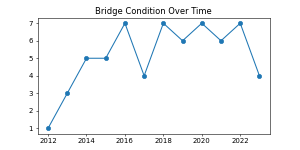

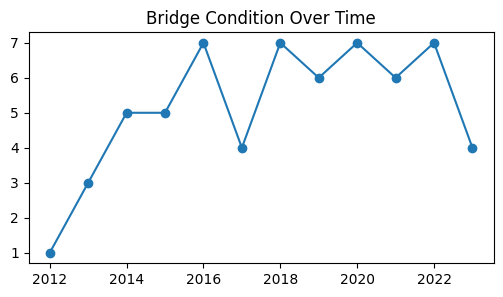

In [ ]:
import folium
import base64
import matplotlib.pyplot as plt
import io
import random

# Create a map centered on a location
m = folium.Map(location=[48.7, 19.6], zoom_start=7, tiles='Stamen Toner')

# Create random data for the line plot
year = list(range(2012, 2024, 1))
sts = [random.randint(1, 7) for _ in year]

# Create a Matplotlib figure with the line plot
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(year, sts, marker='o', linestyle='-')
ax.set_title('Bridge Condition Over Time')

# Convert the Matplotlib figure to a PNG image in memory
png_image = io.BytesIO()
fig.savefig(png_image, format='png', dpi=50)
png_image.seek(0)

# Encode the PNG image as base64
png_base64 = base64.b64encode(png_image.read()).decode('utf-8')

# Define the HTML for the popup with the embedded PNG image
popup_html = f"""
<h3>Bridge Information</h3>
<p>ID: 12345</p>
<p>Condition: Good</p>
<img src="data:image/png;base64,{png_base64}" alt="Chart">
"""

# Add a marker with the popup
folium.Marker(location=[48.75, 19.65], popup=popup_html, icon=folium.Icon(icon="info-sign")).add_to(m)

# Display the map
m


TRASH

In [ ]:
import folium

condition = 1
target_region = 'Košice'  # Specify the target region

# Filter the DataFrame for bridges with condition 6 in the year 2023 and valid coordinates in the target region
filtered_df = merged_df[
    ((merged_df["Longitude"]) != "Nezistený") & ((merged_df["Latitude"]) != "Nezistený") & 
    (merged_df['n_2023'] == condition) & (merged_df['Kraj'] == target_region)
]

# Create a map centered on Slovakia (you can adjust the coordinates and zoom level)
m = folium.Map(location=[48.7, 19.6], zoom_start=7, tiles='Stamen Toner')

# Define a color palette for each region (Kraj)
color_palette = {
    'Bratislava': 'blue',
    'Trnava': 'green',
    'Trenčín': 'red',
    'Nitra': 'purple',
    'Žilina': 'orange',
    'Banská Bystrica': 'lightred',
    'Prešov': 'cadetblue',
    'Košice': 'gray'
}

custom_icon_path = "6-solid.svg"
# Iterate through your DataFrame and add markers for each bridge with color based on region
for index, row in filtered_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['ID mosta'],  # Display bridge ID as a popup
        icon=folium.Icon(icon='5', prefix='fa', color='red'),  # Use color from palette
    ).add_to(m)

# Save the map to an HTML file
m.save('bridges_map_filtered_Košice.html')


In [ ]:
def generate_grayscale_colors(num_colors):
    # Calculate the step size for each shade
    step = 255 // (num_colors - 1) if num_colors > 1 else 0

    # Generate the list of grayscale colors, including black as the last color
    grayscale_colors = ['#{:02X}{:02X}{:02X}'.format(255 - i * step, 255 - i * step, 255 - i * step) for i in range(num_colors - 1)]
    
    # Add black as the last color
    grayscale_colors.append('#000000')

    return grayscale_colors

# Example usage:
num_colors = 12
grayscale_palette = generate_grayscale_colors(num_colors)
print(grayscale_palette, len(grayscale_palette))


['#FFFFFF', '#E8E8E8', '#D1D1D1', '#BABABA', '#A3A3A3', '#8C8C8C', '#757575', '#5E5E5E', '#474747', '#303030', '#191919', '#000000'] 12


In [ ]:
import folium

target_region = 'Košice'  # Specify the target region

# Filter the DataFrame for bridges with valid coordinates in the Košice region
filtered_df = merged_df[
    ((merged_df["Longitude"]) != "Nezistený") & 
    ((merged_df["Latitude"]) != "Nezistený") & 
    (merged_df['Kraj'] == target_region) & 
    (merged_df['n_2023'] == 6) &
    (merged_df['Material'] == "prefabrikovaný predpätý betón")
]

# Create a map centered on Slovakia (you can adjust the coordinates and zoom level)
m = folium.Map(location=[48.63, 21.3], zoom_start=9, tiles='Stamen Toner')

# Define the custom marker icons for each condition
markers_palette = {
    1: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_1.svg',  # Bezchybný
    2: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_2.svg',  # Veľmi dobrý
    3: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_3.svg',  # Dobrý
    4: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_4.svg',  # Uspokojivý
    5: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_5.svg',  # Zlý
    6: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_6.svg',  # Veľmi zlý
    7: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_7.svg',  # Havarijný
    0: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_0.svg',  # Nezistený
}

# Iterate through your DataFrame and add markers for each bridge with custom icons
for index, row in filtered_df.iterrows():
    condition = row['n_2023']  # Get the condition value for the bridge
    marker_icon_url = markers_palette[condition]  # Get the corresponding marker URL
    custom_marker_icon = folium.CustomIcon(
        icon_image=marker_icon_url,
        icon_size=(50, 50),  # Adjust the size as needed
        icon_anchor=(25, 50),  # Adjust the anchor point as needed
    )
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"ID: {row['ID mosta']}, Condition: {row['2023']}",  # Display bridge ID and condition as a popup
        icon=custom_marker_icon,  # Use the custom icon
    ).add_to(m)

# Save the map to an HTML file
# m.save('custom_markers_map.html')
m


['#FFFFFF', 
'#E8E8E8', 
'#D1D1D1', 
'#BABABA', 0
'#A3A3A3', 1
'#8C8C8C', 2
'#757575', 3
'#5E5E5E', 4
'#474747', 5
'#303030', 6
'#191919', 7
'#000000'] 12

In [ ]:
import folium

# Create a map centered on a location
m = folium.Map(location=[48.7, 19.6], zoom_start=7, tiles='Stamen Toner')

# Add a marker with an HTML popup
popup_html = """
<h5>Bridge Information</h5>
<p>ID: 12345</p>
<p>Condition: Good</p>
"""
folium.Marker(location=[48.75, 19.65], popup=popup_html, icon=folium.Icon(icon="info-sign")).add_to(m)

# Display the map
m


In [ ]:
import folium

# Create a map centered on a location
m = folium.Map(location=[48.7, 19.6], zoom_start=7, tiles='Stamen Toner')

# Create custom popup content
popup_content = folium.Popup(
    "Custom Popup Content",
    max_width=300,
    min_width=200,
)
popup_content.add_child(folium.DivIcon(html="<div>Custom Text</div>"))

# Add a marker with custom content popup
folium.Marker(location=[48.75, 19.65], popup=popup_content).add_to(m)

# Display the map
m


In [ ]:
import folium

# Create a map centered on a location
m = folium.Map(location=[48.7, 19.6], zoom_start=7, tiles='Stamen Toner')

# Define dynamic data
bridge_id = 12345
condition = "Good"

# Generate dynamic popup content
popup_text = f"Bridge ID: {bridge_id}<br>Condition: {condition}"

# Add a marker with dynamic content popup
folium.Marker(location=[48.75, 19.65], popup=popup_text).add_to(m)

# Display the map
m
